In [1]:
import numpy as np
import pickle
import sys
import my_bite_detection_utils as bdu
import my_classification_utils as mcu
import os

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
import my_tensorflow_utils as mtu
import importlib
from sklearn import metrics

c:\asm\continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
importlib.reload(mtu)
importlib.reload(bdu)
importlib.reload(mcu)

<module 'my_classification_utils' from 'C:\\ASM\\Dropbox\\Developments\\Jupyter\\Eating\\bite_detection\\my_classification_utils.py'>

In [3]:
root_path ='C:/ASM/DevData/eating' if "C:" in os.getcwd() else "."
print("Root path: ", root_path)    

params = {"x_th": -0,          
          "min_bite_interval": 2*16,
          "window_size": 6*16}

Root path:  C:/ASM/DevData/eating


In [4]:
#Training Parameters
net_params={}
net_params['learning_rate'] = 0.001
net_params['num_epochs'] = 100
net_params['batch_size'] = 128
net_params['keep_prob_val'] = 0.5

In [5]:
windows, ssml, labels, features = bdu.get_windows_lab(params)
print(windows.shape, ssml.shape, np.sum(labels, axis=0))

params["x_th"] = -.3
params["var_th"] = 0.5
cond = (features[:, 0] <=params["x_th"]) & (features[:, -1] >=params["var_th"])
windows = windows[cond]
ssml = ssml[cond]
labels = labels[cond]
features = features[cond]
print(windows.shape, ssml.shape, np.sum(labels, axis=0))

Creating windows and labels ... x_th: 0, min_bite_interval: 32, window_size: 96
(52477, 96, 6) (52477, 4) [47886  3587  1004]
(17287, 96, 6) (17287, 4) [13018  3341   928]


In [6]:
x = np.arange(len(ssml))
y = ssml[:, -1]
train_indices, test_indices, _, _ = train_test_split(x, y, test_size=0.2, stratify=y)

train_x = windows[train_indices]
test_x  = windows[test_indices]
train_y = labels[train_indices, :]
test_y = labels[test_indices, :]

print("Total Train Test: ",np.sum(labels, axis=0), np.sum(train_y, axis=0), np.sum(test_y, axis=0))       

path = root_path+'/outputs/bite_detection_epoch_validation/'+bdu.param_string(params)     
test_pred, train_result, test_result = mtu.train_test_model(train_x, train_y, test_x, test_y, folder_path=path, params=net_params)


Total Train Test:  [13018  3341   928] [10414  2673   742] [2604  668  186]
Inside all_axes_net: x_shape, y_shape : [None, 96, 6] [None, 3]
<class 'list'>
Inside one_axis_net:  conv_axis_0 , x_shape [None, 96, 1]
  Axis count:  1
  Conv_1, maxpool_1 shape:  [None, 92, 1, 16] [None, 46, 1, 16]
  Conv_2, maxpool_2 shape:  [None, 42, 1, 32] [None, 21, 1, 32]
  Conv_3, maxpool_3 shape:  [None, 17, 1, 64] [None, 8, 1, 64]
Shape  0 [None, 512]
Inside one_axis_net:  conv_axis_1 , x_shape [None, 96, 1]
  Axis count:  1
  Conv_1, maxpool_1 shape:  [None, 92, 1, 16] [None, 46, 1, 16]
  Conv_2, maxpool_2 shape:  [None, 42, 1, 32] [None, 21, 1, 32]
  Conv_3, maxpool_3 shape:  [None, 17, 1, 64] [None, 8, 1, 64]
Shape  1 [None, 512]
Inside one_axis_net:  conv_axis_2 , x_shape [None, 96, 1]
  Axis count:  1
  Conv_1, maxpool_1 shape:  [None, 92, 1, 16] [None, 46, 1, 16]
  Conv_2, maxpool_2 shape:  [None, 42, 1, 32] [None, 21, 1, 32]
  Conv_3, maxpool_3 shape:  [None, 17, 1, 64] [None, 8, 1, 64]
Shape

  Train loss: 0.3747, acc: 0.8625, pr: 0.8117, rc: 0.6801, sp: 0.9482, f1: 0.7401
                                   tn: 9960, tp: 2345, fn: 1103, fp: 544
  Test  loss: 0.4365, acc: 0.8392, pr: 0.7760, rc: 0.6370, sp: 0.9397, f1: 0.6997
                                   tn: 2447, tp: 544, fn: 310, fp: 157
Epoch: 18
  Train loss: 0.3605, acc: 0.8681, pr: 0.8244, rc: 0.6769, sp: 0.9527, f1: 0.7434
                                   tn: 10007, tp: 2334, fn: 1114, fp: 497
  Test  loss: 0.4361, acc: 0.8438, pr: 0.7854, rc: 0.6300, sp: 0.9435, f1: 0.6992
                                   tn: 2457, tp: 538, fn: 316, fp: 147
Epoch: 19
  Train loss: 0.3464, acc: 0.8714, pr: 0.8530, rc: 0.6633, sp: 0.9625, f1: 0.7463
                                   tn: 10110, tp: 2287, fn: 1161, fp: 394
  Test  loss: 0.4382, acc: 0.8412, pr: 0.7901, rc: 0.5995, sp: 0.9478, f1: 0.6818
                                   tn: 2468, tp: 512, fn: 342, fp: 136
Epoch: 20
  Train loss: 0.3309, acc: 0.8784, pr: 0.866

  Train loss: 0.1061, acc: 0.9639, pr: 0.9606, rc: 0.9110, sp: 0.9877, f1: 0.9351
                                   tn: 10375, tp: 3141, fn: 307, fp: 129
  Test  loss: 0.5749, acc: 0.8459, pr: 0.7680, rc: 0.6628, sp: 0.9343, f1: 0.7115
                                   tn: 2433, tp: 566, fn: 288, fp: 171
Epoch: 44
  Train loss: 0.0922, acc: 0.9672, pr: 0.9751, rc: 0.9095, sp: 0.9924, f1: 0.9412
                                   tn: 10424, tp: 3136, fn: 312, fp: 80
  Test  loss: 0.6103, acc: 0.8479, pr: 0.7814, rc: 0.6487, sp: 0.9405, f1: 0.7089
                                   tn: 2449, tp: 554, fn: 300, fp: 155
Epoch: 45
  Train loss: 0.0882, acc: 0.9699, pr: 0.9714, rc: 0.9269, sp: 0.9911, f1: 0.9486
                                   tn: 10410, tp: 3196, fn: 252, fp: 94
  Test  loss: 0.6719, acc: 0.8490, pr: 0.7830, rc: 0.6593, sp: 0.9401, f1: 0.7158
                                   tn: 2448, tp: 563, fn: 291, fp: 156
Epoch: 46
  Train loss: 0.0913, acc: 0.9701, pr: 0.9730, r

  Train loss: 0.0299, acc: 0.9907, pr: 0.9848, rc: 0.9797, sp: 0.9950, f1: 0.9823
                                   tn: 10452, tp: 3378, fn: 70, fp: 52
  Test  loss: 0.8569, acc: 0.8490, pr: 0.7677, rc: 0.6967, sp: 0.9309, f1: 0.7305
                                   tn: 2424, tp: 595, fn: 259, fp: 180
Epoch: 70
  Train loss: 0.0273, acc: 0.9914, pr: 0.9869, rc: 0.9835, sp: 0.9957, f1: 0.9852
                                   tn: 10459, tp: 3391, fn: 57, fp: 45
  Test  loss: 0.8985, acc: 0.8511, pr: 0.7888, rc: 0.6604, sp: 0.9420, f1: 0.7189
                                   tn: 2453, tp: 564, fn: 290, fp: 151
Epoch: 71
  Train loss: 0.0301, acc: 0.9912, pr: 0.9818, rc: 0.9875, sp: 0.9940, f1: 0.9847
                                   tn: 10441, tp: 3405, fn: 43, fp: 63
  Test  loss: 0.8720, acc: 0.8482, pr: 0.7568, rc: 0.6885, sp: 0.9274, f1: 0.7210
                                   tn: 2415, tp: 588, fn: 266, fp: 189
Epoch: 72
  Train loss: 0.0277, acc: 0.9914, pr: 0.9818, rc: 0

  Train loss: 0.0124, acc: 0.9961, pr: 0.9919, rc: 0.9927, sp: 0.9973, f1: 0.9923
                                   tn: 10476, tp: 3423, fn: 25, fp: 28
  Test  loss: 1.0641, acc: 0.8514, pr: 0.7809, rc: 0.6803, sp: 0.9374, f1: 0.7272
                                   tn: 2441, tp: 581, fn: 273, fp: 163
Epoch: 96
  Train loss: 0.0131, acc: 0.9968, pr: 0.9965, rc: 0.9925, sp: 0.9989, f1: 0.9945
                                   tn: 10492, tp: 3422, fn: 26, fp: 12
  Test  loss: 0.9612, acc: 0.8499, pr: 0.7825, rc: 0.6698, sp: 0.9389, f1: 0.7218
                                   tn: 2445, tp: 572, fn: 282, fp: 159
Epoch: 97
  Train loss: 0.0141, acc: 0.9956, pr: 0.9927, rc: 0.9913, sp: 0.9976, f1: 0.9920
                                   tn: 10479, tp: 3418, fn: 30, fp: 25
  Test  loss: 1.0667, acc: 0.8464, pr: 0.7828, rc: 0.6499, sp: 0.9409, f1: 0.7102
                                   tn: 2450, tp: 555, fn: 299, fp: 154
Epoch: 98
  Train loss: 0.0135, acc: 0.9966, pr: 0.9936, rc: 0

In [8]:
path = path+'/results'
bdu.create_directory(path)
np.savetxt(path+'/test_y.csv', test_y, fmt='%.4f', delimiter=',')    
np.savetxt(path+'/test_prediction.csv', test_pred, fmt='%.4f', delimiter=',')
np.savetxt(path+'/train_result.csv', train_result, fmt='%.4f', delimiter=',')
np.savetxt(path+'/test_result.csv', test_result, fmt='%.4f', delimiter=',') 

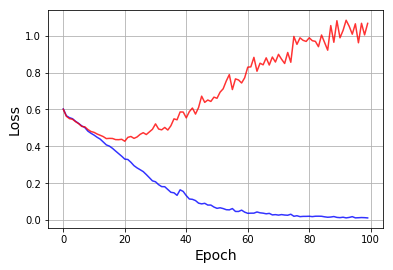

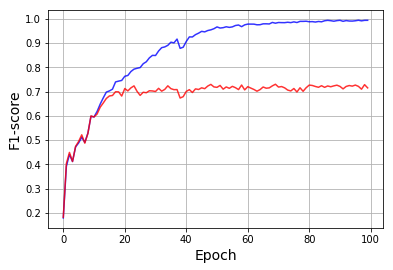

In [9]:
train_result = np.array(train_result)
test_result = np.array(test_result)

#train_result_smooth = mcu.smooth(train_result, 0.8)
#test_result_smooth = mcu.smooth(test_result, 0.8)
#print(train_result_smooth.shape)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_result[:, 0], train_result[:, 1], alpha=0.8, color='blue')
plt.plot(train_result[:, 0], test_result[:, 1], alpha=0.8, color='red')
#plt.plot(train_result[:, 0], train_result_smooth[:, 1], color='blue')

plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.grid(True)
plt.show()

plt.plot(train_result[:, 0], train_result[:, -1], alpha=0.8, color='blue')
plt.plot(train_result[:, 0], test_result[:, -1], alpha=0.8, color='red')
#plt.plot(train_result[:, 0], train_result_smooth[:, 1], color='blue')

plt.ylabel('F1-score', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.grid(True)
plt.show()
